# Data Understanding
Data Understanding – Output of this part will be various visualization of the
variable analysis and finally the Data Quality Report that will identify the data problems
that exist in this dataset.  <br/>
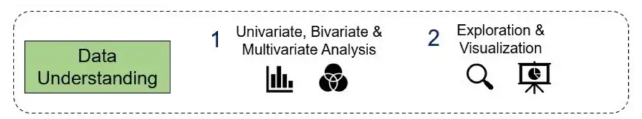

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

In [2]:
# the file is coming from
# github.com/ArinB/MSBA-CA-Data/CA01
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [3]:
# max columns display set to 100

pd.options.display.max_columns = 100

# allow to show all rows 
pd.set_option('display.max_rows', None)

print(df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [4]:
df.shape

(1460, 81)

In [5]:
# info prints to the screen the number of non-missing values of each column

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

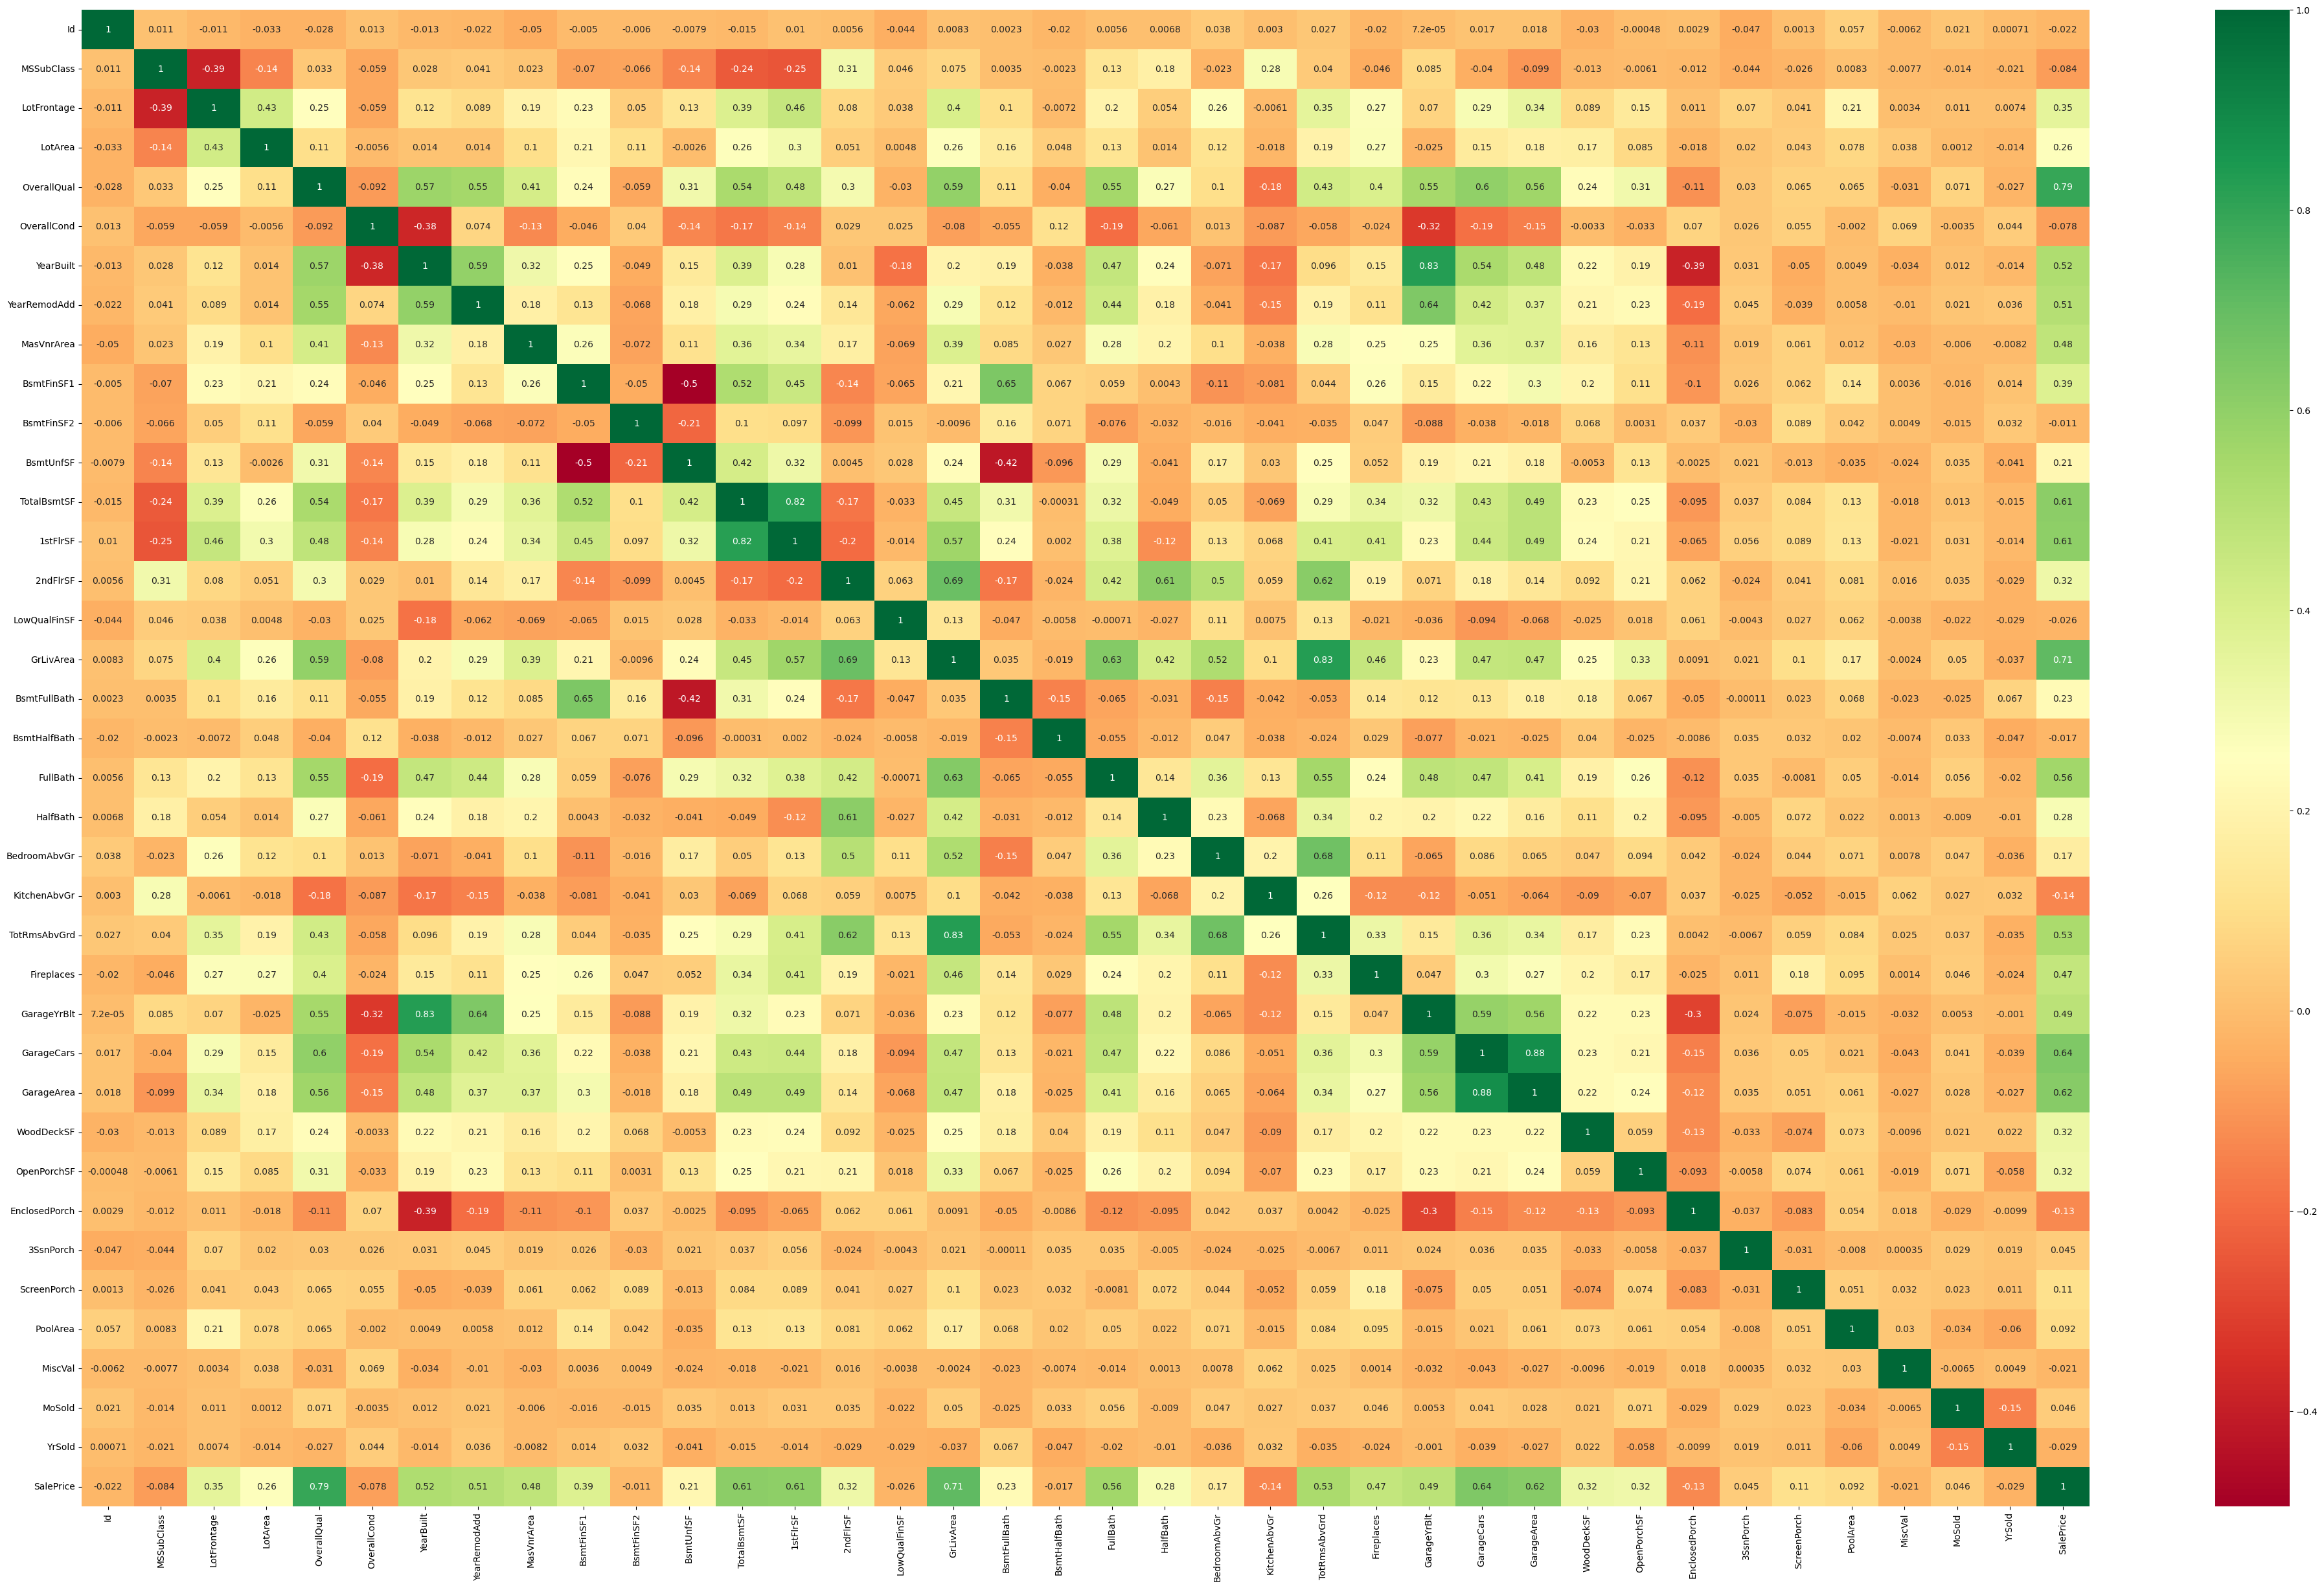

In [6]:
# create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(50, 30))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [7]:
# compare sale price with Year Built
print(df["SalePrice"].corr(df["YearBuilt"]))

0.5228973328794969


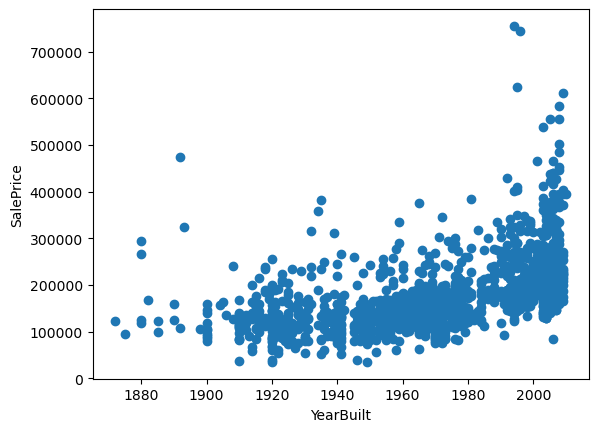

In [8]:
# create a scatter plot to visualize the relationship between Sale Price and Year Built
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

In [9]:
# Compare Sale price with Lot Size
print(df["SalePrice"].corr(df["LotArea"]))

0.26384335387140573


In [10]:
# Compare Sale price with overall quality
print(df["SalePrice"].corr(df["OverallQual"]))


0.7909816005838048


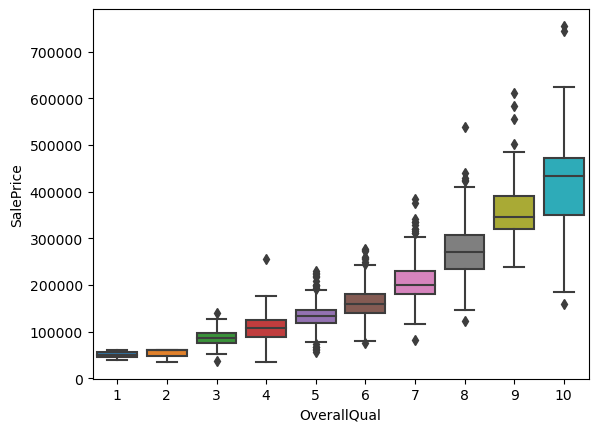

In [11]:
# create a box plot to visualize the distribution of Sale Price by the categories of the Overall Qual
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.ylabel('SalePrice')
plt.show()

In [12]:
# Compare Sale price with Garage Area
print(df["SalePrice"].corr(df["GarageArea"]))

0.6234314389183617


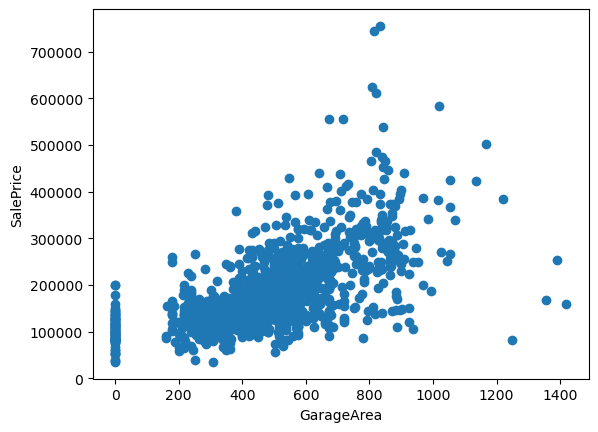

In [13]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['GarageArea'], df['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

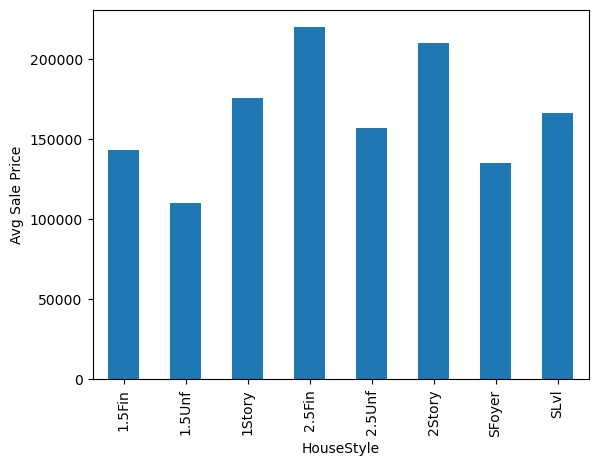

In [14]:
# create a bar plot to visualize the mean of a numeric column for Sale Price of each of the House Style
df_grouped = df.groupby('HouseStyle')
df_grouped = df_grouped['SalePrice'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Avg Sale Price')
plt.show()

# Data Pre-Processing
In this part you will fix the data problems identified in the Data Quality Report
learning from python techniques and code samples. <br/>
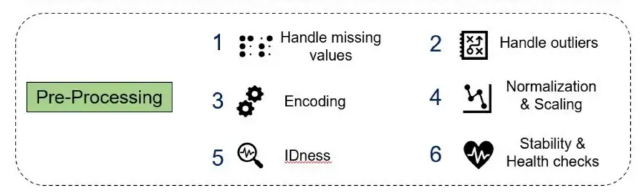

In [15]:
# look into each columns number of NA

df_number_of_missing = df.isna().sum()
percentage_missing = (df_number_of_missing / len(df))
percentage_missing[percentage_missing > 0.6]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [16]:
# Drop the columns with NA values more than 60%
new_df = df.drop(["Alley","PoolQC","Fence","MiscFeature"], axis= 1, inplace= False)
new_df.shape


(1460, 77)

In [17]:
print(new_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea' 'ExterQual'
 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition' 'SalePrice']


In [18]:
# The columns that have missing values
nan_cols = [i for i in new_df.columns if new_df[i].isnull().any()]
new_df[nan_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [19]:
# Find the % of how many missing values for the columns with missing values
new_df[nan_cols].isnull().sum()/len(new_df)

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [20]:
# column FireplaceQu has more than 40% of missing values
new_df = new_df.drop(["FireplaceQu"], axis= 1, inplace= False)
new_df.shape

(1460, 76)

In [21]:
new_df = new_df.drop_duplicates()
new_df.shape

(1460, 76)

In [22]:
# fill the NA of Lot Frontage with the mean of the Column
new_df.LotFrontage.fillna(value=new_df.LotFrontage.mean(), inplace = True)
new_df.LotFrontage.isna().sum()

0

In [23]:
# look into the missing values % for the data frame

nan_cols = [i for i in new_df.columns if new_df[i].isnull().any()]
new_df[nan_cols].isnull().sum()/len(new_df)

MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [24]:
# since all columns has lass than 3% of missing values out of 1460 rows.
# drop all the rows if there is any item is NA
new_df.dropna(inplace = True)

In [25]:
# 122 rows being dropped
new_df.shape

(1338, 76)

In [26]:
# check if there is any NA in the DF
new_df.isna().values.any()

False

In [27]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
# First set the Sale Condition into a category column
new_df.SaleCondition = new_df.SaleCondition.astype("category")
new_df.SaleCondition.dtypes


CategoricalDtype(categories=['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal',
                  'Partial'],
, ordered=False)

In [29]:

new_df["SaleConditionEncode"] = new_df.SaleCondition.cat.codes
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleConditionEncode
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,4
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,4
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,4
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,4


In [30]:
# Remove outliers
new_df["SalePrice"].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [31]:
saleprice_Q1 = new_df["SalePrice"].quantile(0.25)
saleprice_Q3 = new_df["SalePrice"].quantile(0.75)
saleprice_IQR = saleprice_Q3 - saleprice_Q1

In [32]:
print(f"The Sale Price IQR: {saleprice_IQR}")

The Sale Price IQR: 85000.0


In [33]:
lower_lim = saleprice_Q1 - 1.5 * saleprice_IQR
upper_lim = saleprice_Q3 + 1.5 * saleprice_IQR

In [34]:
print(f"The Sale Price lower limit: {lower_lim} and the upper limit: {upper_lim}")

The Sale Price lower limit: 7500.0 and the upper limit: 347500.0


In [35]:
outliers_15_low =(new_df.SalePrice < lower_lim)
outliers_15_up =(new_df.SalePrice > upper_lim)
len(new_df.SalePrice) - (len(new_df.SalePrice[outliers_15_low]) + len(new_df.SalePrice[outliers_15_up]))

1282

In [36]:
# show all the outliers
new_df.SalePrice[(outliers_15_low | outliers_15_up)].count()

56

In [37]:
new_df.SalePrice[~(outliers_15_low | outliers_15_up)].count()

1282

In [38]:
new_df = new_df[~(outliers_15_low | outliers_15_up)]

In [39]:
new_df.shape

(1282, 77)

# Data Post Processing
For this part, ONLY do the “collinearity” visualization and identification of the
features that needs to be dropped (feature selection). <br/>
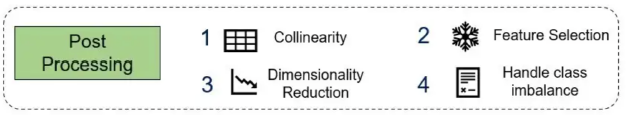

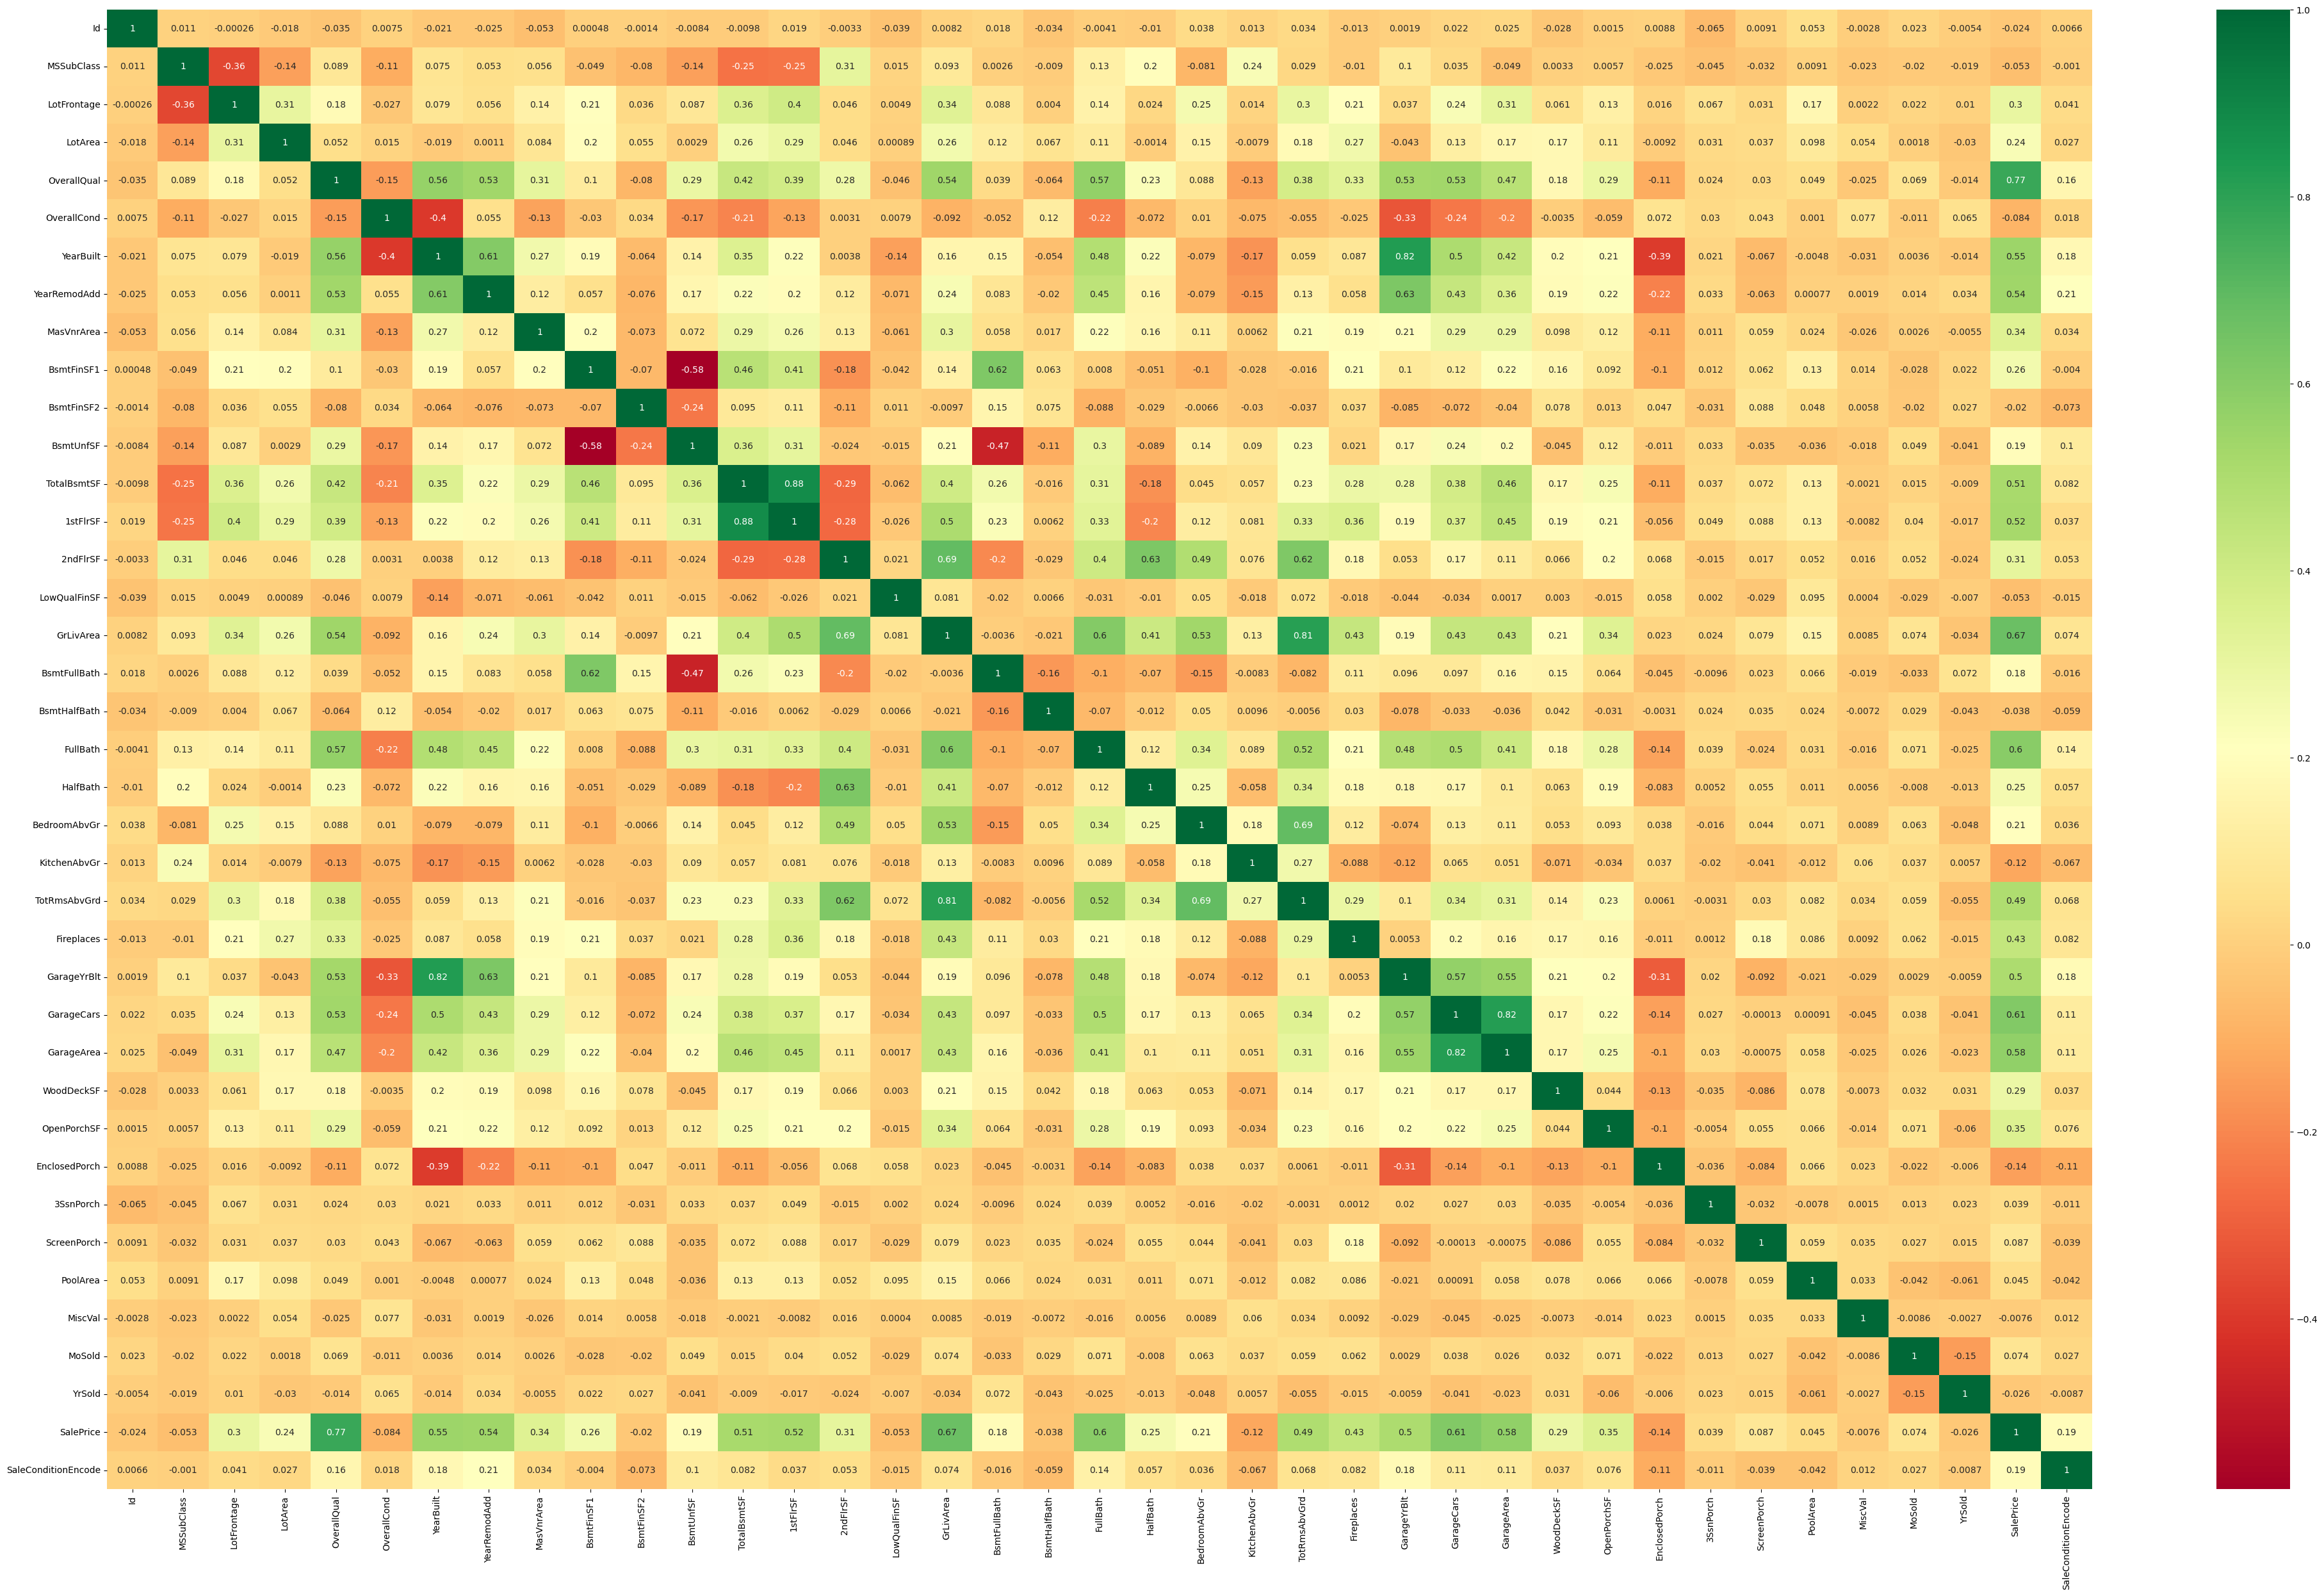

In [40]:
# only do Collinearity and Feature Selection

# create a heatmap to visualize the collinearity between multiple columns
plt.figure(figsize=(50, 30))
sns.heatmap(new_df.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [43]:
# Features selection

new_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 

In [68]:
# the list to drop

columns_not_needed = ['Id', 'MSSubClass', 'Street', 'BsmtFinType2', 'BsmtFinSF2','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','BedroomAbvGr', 
                      'KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt','GarageFinish', 'GarageCars','GarageCond','PavedDrive','MoSold','OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch','SaleType', 'HeatingQC','CentralAir', 'RoofMatl', 'Exterior1st','Exterior2nd',
                      'MasVnrType', 'MasVnrArea','ExterCond', 'Foundation','MiscVal']
len(columns_not_needed)

32

In [69]:
df_selected = new_df.drop(columns_not_needed, axis =1)
df_selected.shape

(1282, 45)